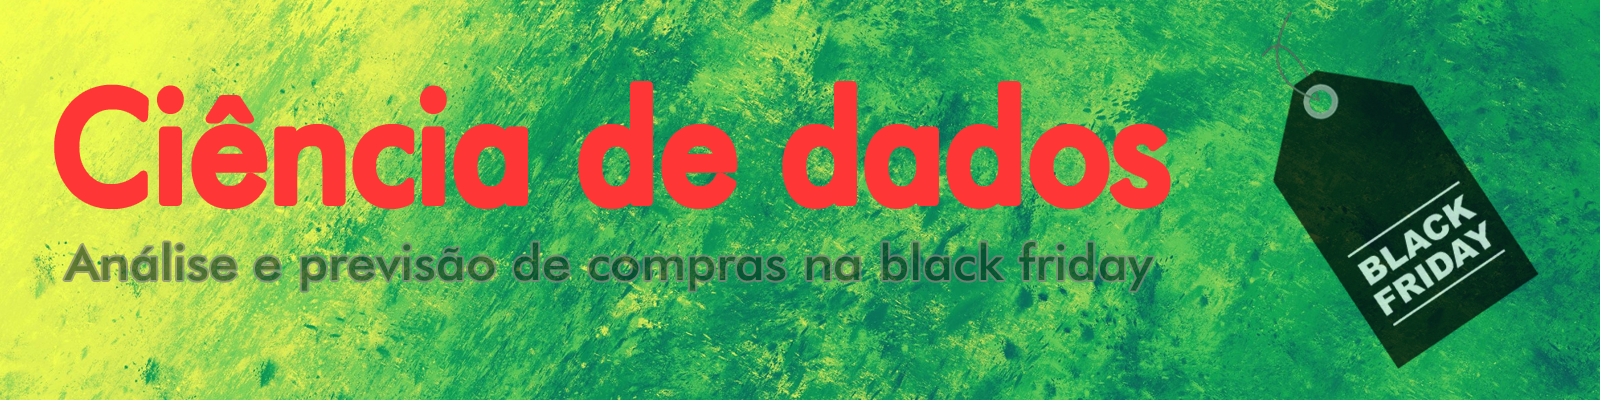

**INFORMAÇOES GERAIS:**

**AUTOR:** Iago Henrique de Oliveira

**CONTATO:** linkedin.com/in/iagohenrique/


**NOTEBOOK COM CÓDIGO E ANÁLISE:**

**NOTEBOOK NBVIEWER:** https://nbviewer.jupyter.org/github/iagoho/selecao_notebook/blob/main/selecao_notebook_iago.ipynb

**NOTEBOOK GITHUB:** https://github.com/iagoho/selecao_notebook/blob/main/selecao_notebook_iago.ipynb

# QUESTÃO DE NEGÓCIOS:

Entender o comportamento das pessoas durante a Black Friday (BF), bem como prever o quanto pessoas com certas características vão gastar durante o referido evento.


#COMPREENDENDO O NEGÓCIO

A BF ocorre todos os anos na última sexta-feira do mês de novembro. Segundo o site Black-Friday.Global, comparado a dias comuns, ocorre um aumento de aproximadamente 663% em termos de média mundial. Este evento é muito importante para lojistas, pois é uma grande oportunidade para realizar um grande número de vendas. 

Os lojistas precisam ter conhecimento das características de compra dos consumidores para a tomada de decisões. Através da análise exploratória dos dados e da previsão de quanto os consumidores irão gastar, estes lojistas podem criar estratégias de marketing para atingir clientes específicos, bem como direcionar ofertas e descontos.


# EXPLORAÇÃO DOS DADOS

**DICIONÁRIO DE DADOS:**
* **User_ID**: identificação do cliente
* **Product_ID**: identificação do produto
* **Gender**: gênero do cliente
* **Age**: idade do cliente
* **Occupation**: códigos para representar a ocupação do cliente
* **City_Category**: códigos das cidades
* **Stay_In_Current_City_Years**: permanência na cidade em anos
* **Marital_Status**: estado civil
* **Product_Category_1**: códigos de produtos da categoria 1
* **Product_Category_2**: códigos de produtos da categoria 2
* **Product_Category_3**: códigos de produtos da categoria 3
* **Purchase**: valor das compras

In [ ]:
Exibindo o tipo das variáveis:

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,int64,object,object,object,int64,object,object,int64,int64,float64,float64,float64


**Análise:** Observa-se que existem features do tipo int, float e object. Posteriormente, este dados serão transformados em números para que os modelos de previsão consigam trabalhar.

In [ ]:
Verificando a existência de valores núlos:

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,0,0,0,0,0,14141,31385,1


**Análise:** Pode-se observar que as features ***Product_Category_2*** e ***Product_Category_3*** possuem muitos valores faltantes. Posteriormente isso precisa ser tratado, pois pode prejudicar os resultados de modelos de *machine learning* ou *deep learning* que venham a ser utilizados, uma vez que cálculos são realizados e, consequentemente, esses valores ausentes influenciarão negativamente no resultado.

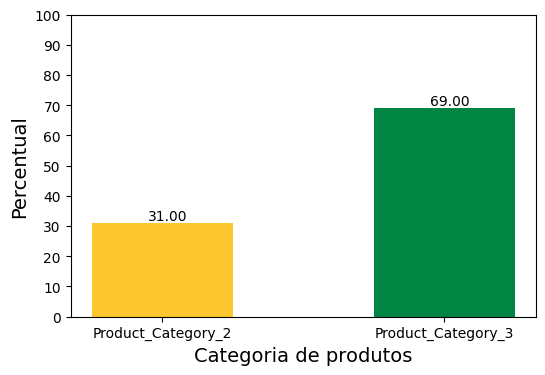

In [ ]:
Exibe o percentual de valores faltantes nas variáveis Product_Category_2 e Product_Category_3:

**Análise:** O percentual de faltantes é enorme. Portanto, não é uma boa estratégia remover as linhas referentes aos valores faltantes. Estes valores faltantes precisam ser subtituídos. Portanto, posteriomente algumas estratégias serão utilizadas para preencher estes valores ausentes.

In [ ]:
Tabela que mostra informações descritivas das variáveis numéricas do conjunto de dados utilizado, visando uma melhor análise:

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
80%,1.004715e+06,16.00000,1.000000,8.000000,15.000000,16.000000,15179.000000
85%,1.005054e+06,17.00000,1.000000,8.000000,16.000000,16.000000,15619.000000
90%,1.005402e+06,17.00000,1.000000,11.000000,16.000000,17.000000,16337.400000


**Análise:** Através da tabela descritiva, foi possível visualizar valor médio da segunda e terceira categoria de produtos, que são respectivamente, 9.8 e 12.7 (valor aproximado). Estes valores médios serão utilizados posteriomente em uma das estratégias para preencher os valores faltantes. Através dos percentis, não foram identificados outliers visíveis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


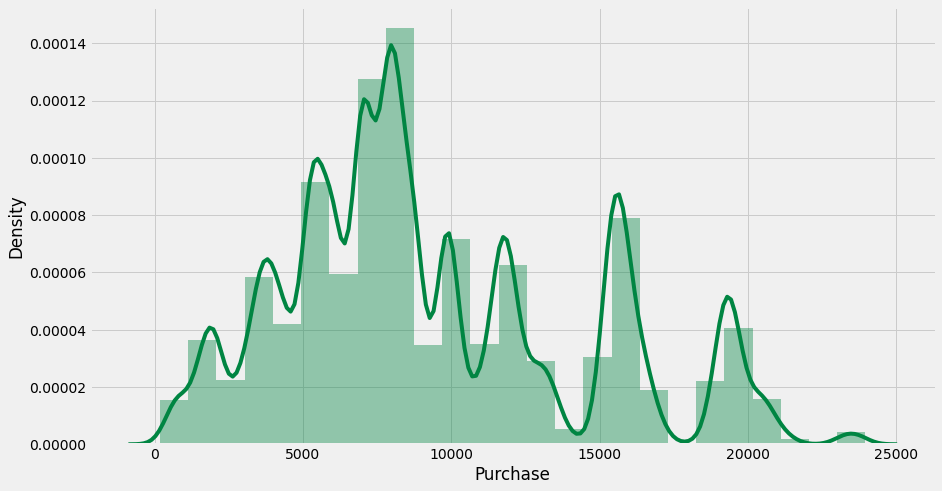

In [ ]:
Como a compra é a variável alvo, foi gerado displot da compra para a análise da distribuição:

**Análise:** Através do gráfico, pode-se observar que os dados de compra seguem uma distribuição gaussiana, ou seja, uma distribuição normal.

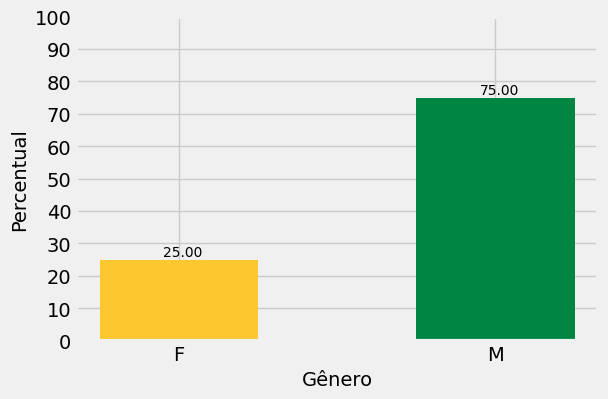

In [ ]:
Gráfico do percentual da quantidade de compras com base no gênero (masculino ou feminimo):

**Análise**: O gráfico mostra que pessoas do sexo masculino realizaram mais na black friday.

O que pode ter levado a isso? Será que os produtos ofertados na black friday não são mais voltados para o público masculino? Ou as mulheres tem tendência de gastar menos?

Ou as mulheres compram mais em outras épocas do ano? Com isso não precisam mais dos produtos ofertados na black friday?

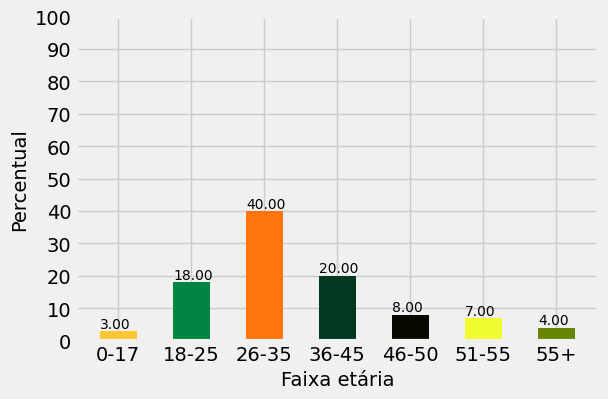

In [ ]:
Gráfico do percentual da quantidade de compras com base na faixa etária:

**Análise:** Observa-se que pessoas com idades entre 26 e 35 anos realizaram mais transações na black friday, bem como pessoas com idades menores ou iguais a 17 anos realizaram uma menor quantidade de transações. Uma observação interessante é que a medida que as pessoas vão ficando mais velhas, o número de compras na black friday vai aumentado. Contudo, observa-se que a partir dos 36 anos o número de compras começam a reduzir. 

Acredito que as pessoas com idades menores ou iguais a 17 compram menos na black friday por ainda serem dependentes de seus familiares (na maioria das vezes).

Mas qual é a justificativa para as pessoas com idades entre 26 e 35 gastarem mais na black friday?

Será uma certa estabilidade financeira (algo que as pessoas com idades entre 18 e 25 anos ainda estão começando a contruir) somada a impulsivida dos mais jovens em sempre estar comprando?

Qual a justificativa para as pessoas com idades maiores ou iguais a 55 anos comprarem menos na black friday?

Será que é porque eles possuem maior controle emocional e financeiro?
Será que eles já possuem tudo o que está sendo ofertado na black friday e não precisam comprar novamente?
Será que é porque a divulgação da black friday não está chegando até essas pessoas?

Acredito que isso é algo que pode ser respondido com a ajuda de profissionais de psicologia e marketing. 

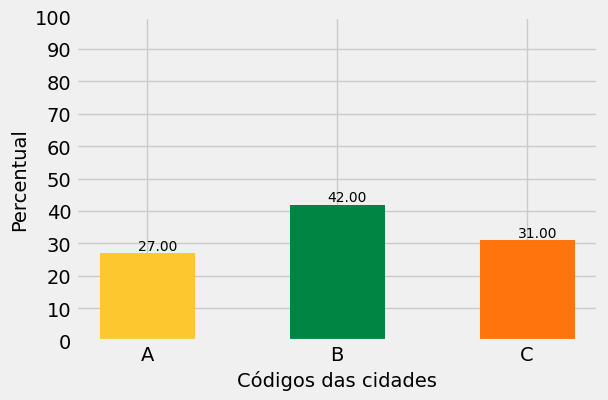

In [ ]:
Gráfico do percentual da quantidade de compras com base no código da cidade:

**Análise:** As pessoas da cidade B realizaram mais transações na black friday.

Qual será o número de habitantes de cada cidade? Será que isso não influenciou nesses resultados?

Caso a quantidades de habitantes não tenha influenciado o resultado, os lojistas podem criar estratégias para oferecer melhores ofertas para pessoas das demais cidades, bem como o setor de marketing pode pensar em ações para que a existência dessas ofertas cheguem até as pessoas destas cidades.

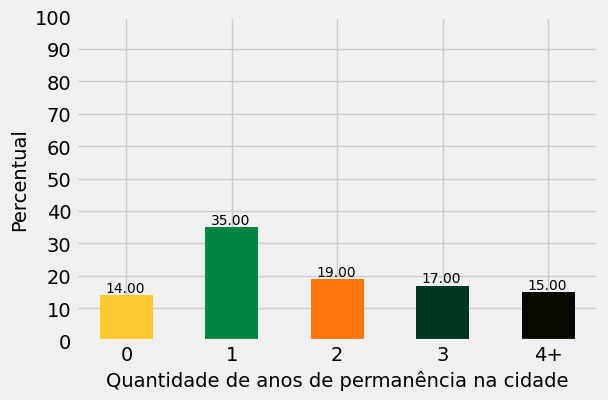

In [ ]:
Gráfico do percentual da quantidade de compras base na quantidade de anos de permanência na cidade:

**Análise:** Observa-se que as pessoas que estavam a 1 ano na cidade fizeram mais transações na black friday.

Acredito que as pessoas que estão a menos de um ano na cidade ainda não a conhecem tão bem. Essas pessoas tendem a conhecer poucas pessoas na cidade e, também, ter medo de sair de casa para fazer compras. Os dados são referentes a compras online ou presencial?

As pessoas que estão a 1 ano na cidade tendem a conhecê-la melhor. Com isso, podem se locomover na cidade com mais facilidade e sem o medo que provavelmente tinham nos meses iniciais. Como ainda são novos na cidade, podem estar a procura de novos produtos que ainda faltam em casa. Além disso, os produtos ofertados na cidade podem ser novidade para essas pessoas.

Observa-se que que depois de 2 anos na cidade, as transações na black friday vão diminuindo. Provavelmente essas pessoas já possuem muitos produtos e, talvez, os produtos ofertados já não sejam novidade ou não seja de interesse dos mesmos.

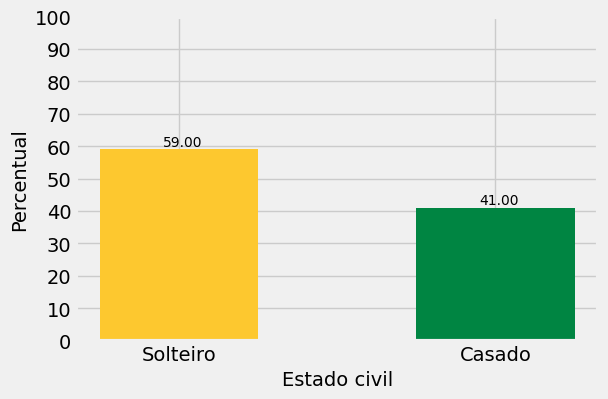

In [ ]:
Gráfico do percentual da quantidade de compras com base no estado civil:

**Análise:** O gráfico mostra que as pessoas solteiras gastaram mais dinheiro na black friday. 

Será que as pessoas casadas pagam aluguem? Eles possuem filhos (biológicos ou adotados)? As duas pessoas estão empregadas? Tudo isso pode influenciar na tendência de compra.

As pessoas solteiras podem morar com os pais e, consequentemente, não ter gastos mensais tão elevados. Com isso, sobra mais dinheiro para gastarem na black friday.

E se ofertas de produtos essenciais para casa fossem oferecidas na black friday? Será que as pessoas casadas não aproveitariam mais a black friday?

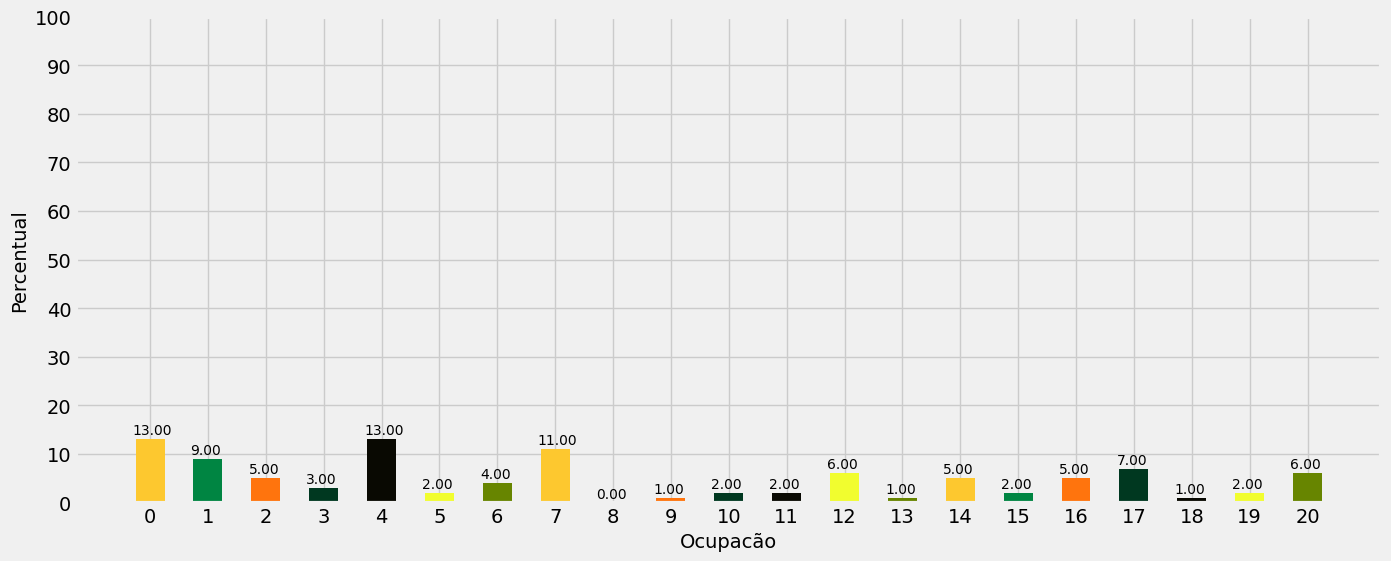

In [ ]:
Gráfico do percentual aproximado da quantidade de compras com base na ocupação:

**Análise:** As pessoas nas quais as ocupações são 0 (13%), 4 (13%) ou 7 (11%) gastaram mais dinheiro na black friday. 

Provavelmente são ocupações que pagam melhores salários. Outra possibilidade é que são ocupações nas quais as pessoas necessitam mais dos produtos que foram ofertados na black friday.

Por exemplo, um profissional que trabalha com desenvolvimento de software precisa de um bom computador, uma boa placa de video, um bom processador. Então, como necessitam de produtos desta natureza, quando aparecem ofertas os mesmos fazem um maior esforço para comprar. As vezes, esperaram o ano inteiro por essa oferta.

Os profissionais responsáveis pela criação de ofertas e anúncios da black friday, podem ofertar produtos e fazer anuncios especificos para cada tipo de público. 

#PREPARAÇÃO DOS DADOS

**ESTRATÉGIA:** 
* Remover as variáveis User_ID e Produt_ID;
* Na variável Age, subtituir '55+' pelo número 55 em todas as ocorrências;
* Na variável Stay_In_Current_City_Years, subtituir '4+' pelo número 4 todas as vezes que o mesmo aparecer;
* Usar o método label encoder para transformar em números inteiros os dados categóricos das variáveis Gender, Age, City_Category;
* Subtituir os valores ausentes das variáveis Product_Category_2 e Product_Category_3 por zero.

In [ ]:
Exibição das primeiras linhas do dataframe após as etapas anteriores:

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


**Na sequência, os dados foram dividido em conjunto de treino (75%) e teste (25%).**

A normalização é necessária apenas quando os parâmetros possuem intervalos muito diferentes. Neste caso específico, os intervalos não são muito diferentes. Portanto, não é necessário realizar a normalização. Realizei um teste com a normalização e o resultado não melhorou. Desta maneira, não realizar a normalização proporcionará uma economia de tempo.

#SELEÇÃO DE VARIÁVEIS

Para selecionar as variáveis mais importantes, utilizei um modelo bem simples chamado LASSO. Uma vantagem desse modelo é saber o quanto cada variável influencia na predição. Existem outras maneiras de saber quais variáveis são importantes na predição, mas utilizarei este método porque já tive sucesso utilizado o mesmo outras vezes.

* LASSO CV

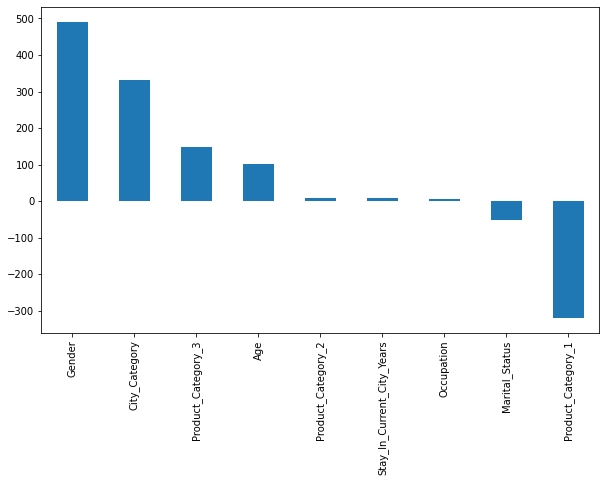

In [ ]:
Gráfico mostrado a importância das variáveis segundo o laço.

Por meio do resultado do LASSO, observa-se que Stay_In_Current_City_Years, Occupation, Marital_Status e Product_Category_2 não foram muito relevantes na predição, uma vez que o peso atribuído foi muito baixo.  

*BORUTA + RANDOM FOREST REGRESSOR

Outro método que pode ser utilizado para verificar as variáveis mais relevantes para o modelo é o BORUTA. Contudo, diferente do LASSO, ele leva muito tempo para fornecer as váriáveis que considera relevantes.

In [ ]:
Processamento do boruta, onde ele tenta verificar as variáveis mais importantes para o modelo.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	2


In [ ]:
Variáveis selecionadas pelo BORUTA.

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

Segundo o resultado do BORUTA, as variáveis mais importantes na predição são: Gender, Age, Occupation, City_Category Product_Category_1, Product_Category_2, Product_Category_3. O BORUTA rejeitou as variáveis Stay_In_Current_City_Years e Marital_Status.

Inicialmente os modelos serão testados por meio das variáveis selecionadas por meio do LASSO e, logo em seguida, serão testados por meio das variáveis selecionadas pelo BORUTA. 

Para testar qual método de seleção de variáveis proporcionou um menor erro, foi criado um modelo *random forest regressor* com os hiperparâmetros padrões do sklearn. Esse modelo foi testado com as variáveis identificadas por meio do LASSO e com as variáveis selecionadas pelo BORUTA. 

In [ ]:
RMSE usando as variáveis do LASSO:

RMSE: 3006.2863530893874


In [ ]:
RMSE usando as variáveis do BORUTA.

RMSE: 3042.2627050007104


Como pode ser observado, o resultado da Raiz do Erro Quadrático Médio (RMSE, do inglês Root Mean Squared Error) foi muito semelhante utilizando as variáveis encontradas pelos dois métodos de seleção de variáveis. Contudo, as variáveis identificadas por meio do LASSO geraram uma RMSE menor. Portanto, as variáveis do LASSO serão consideradas nos demais testes.

#CONSTRUÇÃO DE MODELOS DE PREVISÃO

Inicialmente os modelos serão testados utilizando os hiperparâmetros padrões. Após encontrar o melhor modelo e o método de seleção de variáveis mais eficaz, será feito o ajuste de hiperparâmetros do melhor modelo.

**MODELOS UTILIZADOS**:
* Ridge
* Decision Tree
* Random Forest
* XGBoost

#AVALIAÇÃO DOS MODELOS (COM HIPERPARÂMETROS PADRÕES):

Para avaliar os modelos foram utilizadas duas métricas de desempenho:

* O **Coeficiente de Determinação** (R² ou R2_SCORE) é uma medida estatística que tem como objetivo mostrar o quão próximos os dados estão da linha de regressão ajustada. Em outras palavras, ele mede o quão bem o modelo de regressão se ajusta aos dados observados. Esta métrica é utilizada em diversos papers internacionais, caracterizando-se como uma ótima métrica para avaliar o desempenho de modelos de regressão.


* A **Raiz do Erro Quadrático Médio** (RMSE, do inglês Root Mean Squared Error) é uma métrica de avaliação de modelos de regressão que calcula a raiz quadrática média dos erros entre valores reais e os valores preditos pelo modelo de regressão. Seu valor pode ser usado como parâmetro para que os cientistas de dados criem estratégias para diminuir o erro do modelo de regressão utilizado. 

In [ ]:
RESULTADOS DE CADA MODELO

,Nome,RMSE,R2 SCORE,Tempo Treino
0,Ridge,4643.56,0.13,0.04
1,Decision Tree,3006.84,0.64,0.66
2,Random Forest,3005.98,0.64,51.17
3,XGBoost,3016.53,0.63,16.69


**ANÁLISE:** Os modelos que apresentaram o menor RMSE e maior R2 SCORE (Coeficiente de Determinação - R²) foram árvore de decisão e floresta aleatória. O R2 SCORE foi igual a 0.64 para os dois modelos. O modelo de floresta aleatória apresentou uma RMSE igual a 3005.98. Já o modelo de árvore de decisão conseguiu uma RMSE igual a 3006.98. Ressalta-se que o tempo de treinamento do modelo de árvore de decisão foi muito menor. Portanto, embora o mesmo tenha alcançado um RMSE e um R2 SCORE um pouco menor em comparação a floresta aleatória, considero que o referido modelo foi mais eficiente. 